In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 연산자 우선순위

연산자 순위가 작은게 먼저 실행됨

| 우선 순위| 연산자| 설명
|-|-|-|
|9|&| 비트 AND|
|10|^| 비트 XOR|
|11|\|| 비트 OR|
|12|in, not in, is, is not, <, <=, >, >=, !=, ==| 포함 연산자, 객체 비교 연산자, 비교 연산자|




In [ ]:
a = 2 + 4 * 5
a

22

In [ ]:
idx = np.array([0, 1, 1, 2, 2])
scores = np.array([10, 20, 30, 40, 50])

scores[ (idx == 0) | (idx == 1) ]

array([10, 20, 30])

In [ ]:
# scores[ idx == 0 | idx == 1 ]
# ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Standard Normal Distribution

`numpy.random.randn`

Return a sample (or samples) from the “standard normal” distribution.
* 평균이 $\mu=0$ 이고 표준편차가 $\sigma=1$ 인 가우시안 분포로 부터 임의의 샘플을 가져옴

<img src="https://miro.medium.com/max/2400/1*IdGgdrY_n_9_YfkaCh-dag.png" width=60%>

In [ ]:
np.random.randn(10)

array([-0.56145029,  0.03278958,  1.47512574, -0.0231749 ,  1.44406126,
        0.92833359,  0.10594176,  0.4213978 ,  0.49613952,  0.91225954])

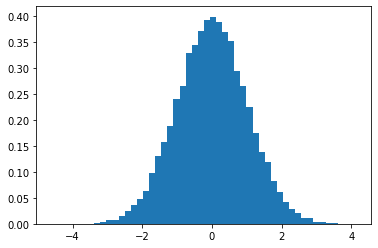

In [ ]:
# 히스토그램(histogram)
v = np.random.randn(20000)
plt.hist(v, bins=50, density=1)
plt.show()

# Pandas


The primary two components of pandas are the `Series` and `DataFrame`.

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`.

* `Series` 는 다양한 데이터 타입을 가지는 1차원의 labeled array (integers, strings, floating point numbers, Python objects, etc.). 


## `pd.Series`
### From ndarray

In [ ]:
# pd.Series(data, index=index)
# data와 index는 반드시 동일한 길이를 가져야 함

# From ndarray
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

print(s)

a    1.584613
b   -1.839041
c    0.251118
d    0.284561
e    1.431243
dtype: float64


In [ ]:
print(s.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [ ]:
# index가 따로 정해지지 않는 경우, 정수형 index  [0, ..., len(data) - 1]를 사용
print(pd.Series(np.random.randn(5)))

0    0.065210
1    0.174846
2   -0.481231
3    1.169239
4    1.535725
dtype: float64


### From dict

key가 index가 되고, index 순서는 값을 딕셔너리에 입력한 순서로 정해짐

In [ ]:
# From dict
# 
d = {'b': 1, 'a': 0, 'c': 2}

print(pd.Series(d))

b    1
a    0
c    2
dtype: int64


In [ ]:
d = {'a': 0., 'b': 1., 'c': 2.}

print(pd.Series(d))

a    0.0
b    1.0
c    2.0
dtype: float64


In [ ]:
d['a']

0.0

In [ ]:
2 in [1,2,3,4,5]

True

In [ ]:
'a' in pd.Series(d)

True

In [ ]:
# index에 해당되지 않은 딕셔너리 키에 해당하는 값은 NaN 으로 설정됨
# {'a': 0., 'b': 1., 'c': 2.}
series_with_nan = pd.Series(d, index=['b', 'c', 'd', 'a'])
print(series_with_nan)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


`NaN` (Not a Number) 는 `pandas`에서 데이터가 없다(missing)는 뜻의 표기로 사용

`isnull()`: 결측값(NA)인지 체크

`notnull()`: 결측값이 아닌 값인지 체크

In [ ]:
pd.isnull(series_with_nan)

b    False
c    False
d     True
a    False
dtype: bool

In [ ]:
pd.notnull(series_with_nan)

b     True
c     True
d    False
a     True
dtype: bool



### From scalar

In [ ]:
print(pd.Series(5., index=['a', 'b', 'c', 'd', 'e']))

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64


### Series is ndarray-like

`Series` 는 `ndarray`와 비슷하지만, `Series`에서는 slicing을 통해서 index도 같이 slice 됨

In [ ]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

print(s)
print('\n s[0] \n', s[0], sep= '')
print('\n s[:3] \n', s[:3] ,sep='')
print('\n s[s > s.median()] \n', s[s > s.median()], sep= '')
print('\n np.exp(s) \n', np.exp(s), sep='')
print('\n s[[4, 3, 1]] \n', s[[4, 3, 1]], sep= '')

a    0.426770
b    0.050957
c   -0.227656
d    0.204560
e    2.202638
dtype: float64

 s[0] 
0.4267704724909995

 s[:3] 
a    0.426770
b    0.050957
c   -0.227656
dtype: float64

 s[s > s.median()] 
a    0.426770
e    2.202638
dtype: float64

 np.exp(s) 
a    1.532301
b    1.052278
c    0.796398
d    1.226985
e    9.048855
dtype: float64

 s[[4, 3, 1]] 
e    2.202638
d    0.204560
b    0.050957
dtype: float64


In [ ]:
print(s.dtype)

float64


In [ ]:
print(s.to_numpy())  # return ndarray

[ 0.42677047  0.05095702 -0.22765569  0.20456008  2.20263828]


#### Series 간 연산

In [ ]:
obj1 = pd.Series([4, 3, 2, 1], index=["a","b","c", "d"])

obj1

a    4
b    3
c    2
d    1
dtype: int64

In [ ]:
obj2 = pd.Series([1, 2, 3, 4, 5], index=["c","d","b", "a", "v"])

obj2

c    1
d    2
b    3
a    4
v    5
dtype: int64

`Series`와 `ndarray`의 연산에 대한 핵심 차이점은 `Series`는 연산 결과를 자동으로 label에 따라서 정렬한다는 점

In [ ]:
# 색인 기준 연산
obj1 + obj2

a    8.0
b    6.0
c    3.0
d    3.0
v    NaN
dtype: float64

`dropna` 메소드를 통해 `NaN` 값을 제거할 수 있음

In [ ]:
(obj1 + obj2).dropna()

a    8.0
b    6.0
c    3.0
d    3.0
dtype: float64

In [ ]:
obj1.add(obj2, fill_value=0) #fill_value: obj1에 존재하지 않는 index의 경우 채워질 값 설정 (v = 0.0 + 5.0)

a    8.0
b    6.0
c    3.0
d    3.0
v    5.0
dtype: float64

In [ ]:
obj1.sub(obj2, fill_value=0) # 이외에도 mul(), div(), mod() %, pow() **2 등... 적용

a    0.0
b    0.0
c    1.0
d   -1.0
v   -5.0
dtype: float64

## `pd.DataFrame`

DataFrame 은 label이 존재하는 2차원 데이터 구조


<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png" width=50%>

### From Series

In [ ]:
# key (column) : value (row) with index
d = {'apples': pd.Series([3., 2., 0., 1.], index=['a', 'b', 'c', 'd']),
      'oranges': pd.Series([0., 3., 7., 2.], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)

df

,apples,oranges
a,3.0,0.0
b,2.0,3.0
c,0.0,7.0
d,1.0,2.0


In [ ]:
# Series의 index에 해당하는 행(row)만 출력
pd.DataFrame(d, index=['d', 'b', 'a'])

,apples,oranges
d,1.0,2.0
b,2.0,3.0
a,3.0,0.0


In [ ]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['oranges', 'strawberry'])

,oranges,strawberry
d,2.0,NaN
b,3.0,NaN
a,0.0,NaN


In [ ]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['apples', 'oranges'], dtype='object')

In [ ]:
df.values

array([[3., 0.],
       [2., 3.],
       [0., 7.],
       [1., 2.]])

In [ ]:
np.all(df.values == df.to_numpy())

True

### From Dict

In [ ]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2],
    'grapes':[2, 5, 6, 1]
}

purchases = pd.DataFrame(data)

purchases

,apples,oranges,grapes
0,3,0,2
1,2,3,5
2,0,7,6
3,1,2,1


In [ ]:
pd.DataFrame(data, columns=["grapes", "oranges", "apples"], index=['a','b','c','d'])  # 원하는 순서로 열 배치

,grapes,oranges,apples
a,2,0,3
b,5,3,2
c,6,7,0
d,1,2,1


In [ ]:
pd.DataFrame(data, columns=["grapes", "oranges", "apples", "strawberry"])  # 없는 열 이름은 NaN으로 채움

,grapes,oranges,apples,strawberry
0,2,0,3,NaN
1,5,3,2,NaN
2,6,7,0,NaN
3,1,2,1,NaN


In [ ]:
purchases['apples']  #  열(column) 접근

0    3
1    2
2    0
3    1
Name: apples, dtype: int64

In [ ]:
purchases.loc[0]  # index를 통해 행 접근  locate

apples     3
oranges    0
grapes     2
Name: 0, dtype: int64

In [ ]:
purchases.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
purchases.values

array([[3, 0, 2],
       [2, 3, 5],
       [0, 7, 6],
       [1, 2, 1]])

In [ ]:
# index 수정 하기
pur_index = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

pur_index

,apples,oranges,grapes
June,3,0,2
Robert,2,3,5
Lily,0,7,6
David,1,2,1


#### `DataFrame`의 행, 열 접근

In [ ]:
pur_index['apples'] # 열 접근

June      3
Robert    2
Lily      0
David     1
Name: apples, dtype: int64

In [ ]:
pur_index.apples  # 속성을 통해 열 접근 가능

June      3
Robert    2
Lily      0
David     1
Name: apples, dtype: int64

`loc`과 `iloc`를 이용하여 `DataFrame`의 행 접근

In [ ]:
pur_index.loc['June'] # 행 접근

apples     3
oranges    0
grapes     2
Name: June, dtype: int64

In [ ]:
pur_index.iloc[0]   # 행 접근시 정수형 index 사용

apples     3
oranges    0
grapes     2
Name: June, dtype: int64

In [ ]:
pur_index[:2]   # slicing 은 loc을 사용하지 않아도 행 접근이 가능

,apples,oranges,grapes
June,3,0,2
Robert,2,3,5


In [ ]:
# numpy 의 fancy indexing 가능
pur_index.loc[['June', 'Lily']]

,apples,oranges,grapes
June,3,0,2
Lily,0,7,6


In [ ]:
# 행과 열 색인
pur_index.iloc[[0, 2]].grapes

June    2
Lily    6
Name: grapes, dtype: int64

### From a list of dicts

In [ ]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [ ]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [ ]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


### `pd.data_range` 로 시계열 DataFrame 만들기


In [ ]:
pd.date_range(start='1/1/2018', end='1/08/2018')
# freq='D': calendar day frequency

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
for x in 'ABCD':
  print(x)

A
B
C
D


In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))  # list('ABCD') == ['A','B','C','D']
df

,A,B,C,D
2013-01-01,-0.643251,0.322094,0.663573,-0.905300
2013-01-02,-0.884213,0.032325,1.370314,1.498016
2013-01-03,-0.145482,-0.700471,-1.747884,1.127790
2013-01-04,1.384486,1.888319,-0.812640,0.449564
2013-01-05,-2.750040,-1.397696,0.803136,-0.950402
2013-01-06,0.597309,-0.161541,-0.293291,0.793618


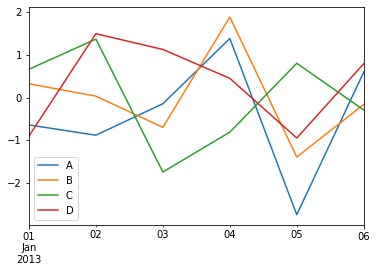

In [ ]:
ax = df.plot(kind="line")
ax

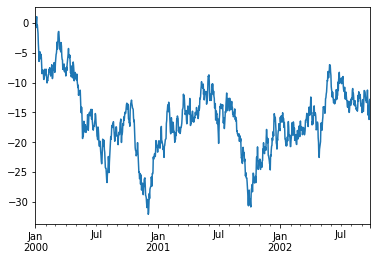

In [ ]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

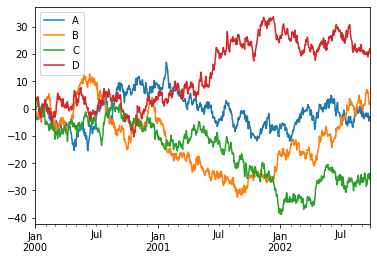

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

df.plot()
plt.show()

### `Missing data`

In [ ]:
df = pd.DataFrame(data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2],
    'grapes':[2, 5, 6, 1]
}, index=['a','b','c','d'])

df

,apples,oranges,grapes
a,3,0,2
b,2,3,5
c,0,7,6
d,1,2,1


In [ ]:
# reindex: 자료를 새로운 색인에 맞게 재배열
df2 = df.reindex(index=list(df.index), columns=list(df.columns) + ['strawberry'])

df2

,apples,oranges,grapes,strawberry
a,3,0,2,NaN
b,2,3,5,NaN
c,0,7,6,NaN
d,1,2,1,NaN


In [ ]:
df2.loc[['a', 'b'], 'strawberry'] = 1

df2

,apples,oranges,grapes,strawberry
a,3,0,2,1.0
b,2,3,5,1.0
c,0,7,6,NaN
d,1,2,1,NaN


In [ ]:
df2.dropna(how='any')  # drop 'any' rows that have missing data (NaN).

,apples,oranges,grapes,strawberry
a,3,0,2,1.0
b,2,3,5,1.0


In [ ]:
df2.fillna(value=5)  # Filling missing data

,apples,oranges,grapes,strawberry
a,3,0,2,1.0
b,2,3,5,1.0
c,0,7,6,5.0
d,1,2,1,5.0


In [ ]:
pd.isna(df2)

,apples,oranges,grapes,strawberry
a,False,False,False,False
b,False,False,False,False
c,False,False,False,True
d,False,False,False,True
